In [3]:
import pandas as pd
import researchpy as rp
from scipy import stats

In [4]:
df=pd.read_csv("/home/nithesh/Desktop/Datasets/Iris_Data.csv")

In [5]:
df.groupby("species")['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [6]:
rp.summary_cont(df.groupby("species")['sepal_width'])

,N,Mean,SD,SE,95% Conf.,Interval
species,,,,,,
Iris-setosa,50,3.418,0.381024,0.053885,3.311313,3.524687
Iris-versicolor,50,2.770,0.313798,0.044378,2.682136,2.857864
Iris-virginica,50,2.974,0.322497,0.045608,2.883701,3.064299


In [7]:
setosa = df[(df['species'] == 'Iris-setosa')]
setosa.reset_index(inplace= True)

versicolor = df[(df['species'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

In [8]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.41728596812962016)

In [9]:
diff = setosa['sepal_width'] - versicolor['sepal_width']

In [10]:
diff

0     0.3
1    -0.2
2     0.1
3     0.8
4     0.8
5     1.1
6     0.1
7     1.0
8     0.0
9     0.4
10    1.7
11    0.4
12    0.8
13    0.1
14    1.1
15    1.3
16    0.9
17    0.8
18    1.6
19    1.3
20    0.2
21    0.9
22    1.1
23    0.5
24    0.5
25    0.0
26    0.6
27    0.5
28    0.5
29    0.6
30    0.7
31    1.0
32    1.4
33    1.5
34    0.1
35   -0.2
36    0.4
37    0.8
38    0.0
39    0.9
40    0.9
41   -0.7
42    0.6
43    1.2
44    1.1
45    0.0
46    0.9
47    0.3
48    1.2
49    0.5
Name: sepal_width, dtype: float64

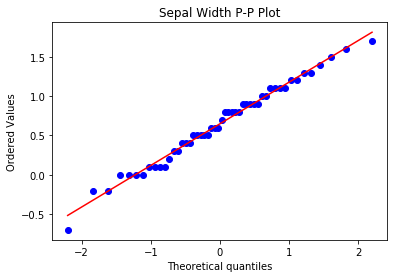

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

stats.probplot(diff, plot= plt)
plt.title('Sepal Width P-P Plot') 
plt.savefig('Sepal Width Residuals.png')

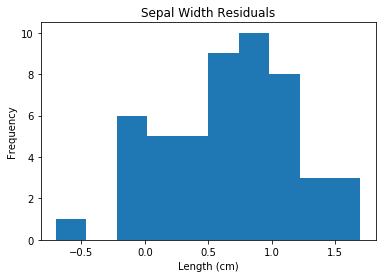

In [13]:
diff.plot(kind= "hist", title= "Sepal Width Residuals")
plt.xlabel("Length (cm)")
plt.savefig("Residuals Plot of Sepal Width.png")

In [14]:
stats.shapiro(diff)

(0.9859335422515869, 0.8108891248703003)

# Independent t-test using scipy.stats

In [15]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

# Independent t-test using researchpy

In [16]:
descriptives, results = rp.ttest(setosa['sepal_width'], versicolor['sepal_width'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sepal_width,50.0,3.418,0.381024,0.053885,3.309714,3.526286
1,sepal_width,50.0,2.770,0.313798,0.044378,2.680820,2.859180
2,combined,100.0,3.094,0.476057,0.047606,2.999540,3.188460


In [17]:
results

,Independent t-test,results
0,Difference (sepal_width - sepal_width) =,0.6480
1,Degrees of freedom =,98.0000
2,t =,9.2828
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.8566
7,Hedge's g =,1.8423
8,Glass's delta =,1.7007
9,r =,0.6840
